# Indiana Science Standards Analysis  
Analysis for the Indiana Department of Education - By Kristen Davis

# Libraries & Data Packages 
A broad array of libraries and functions that are implemented through the notebook including custom built functions.

In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
#custom functions 
from projectfunctions import * 

In [188]:
#Data Collections
from bs4 import BeautifulSoup 
import requests  
from time import sleep  
import numpy as np 
from random import randint

#Data Analysis 
import pandas as pd
import numpy as np  
np.random.seed(0) 
import pickle 
from itertools import chain 

#Data Visulaization 
import matplotlib.pyplot as plt  
import matplotlib.cm as cm 
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
from urllib.request import urlopen
import json  
import seaborn as sns  
from PIL import Image


#Natural Language Processing 
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist 
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.collocations import * 
import string 
import re 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import gensim 
from gensim.parsing.preprocessing import preprocess_documents 
import py_stringmatching as sm 
from gensim.models import Word2Vec 
from fuzzywuzzy import fuzz 
from py_stringmatching import MongeElkan, Levenshtein, BagDistance, Jaccard  
from nltk.stem.porter import * 
import scattertext as st
import spacy
from pprint import pprint

#Modeling 
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.decomposition import PCA  

from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.metrics import calinski_harabasz_score, confusion_matrix 
from sklearn.metrics import classification_report 

from sklearn.datasets import fetch_20newsgroups 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB  
from scipy.spatial.distance import pdist, squareform 
from sklearn.manifold import TSNE 
from collections import defaultdict 
from sklearn.pipeline import make_pipeline 
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
from scipy.cluster.hierarchy import ward, dendrogram 
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.manifold import MDS

# NGSS Standards  
A set of K - 12 Science standards centered around three dimensions: core ideas, practices, and cross cutting concepts. This will be the primary text used in this project and the benchmark used in analysis and comparison.

## Text Processing 
A general text cleaning as well as specific text based word removal.

In [104]:
ngss = open_and_flatten('TXTfiles/ngss')

In [105]:
len(ngss)

41298

In [106]:
#look at the top 50 words on general process ngss  
ngss_generalclean_freqdist = FreqDist(ngss)
ngss_generalclean_freqdist.most_common(10)

[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292)]

In [258]:
#remove additional stop words
ngss_stopwords_list = ['hs', 'ms', 'ls', 'ess', 'ps', 'state', 'standards', 
                       'permisssion', 'inc', 'september', 'rights reserved', 
                       'ets', 'science', 'rights', 'reserved', 'section', 
                       'entitled', 'marked', 'asterisk', 'science', 'archive', 
                      'preformance', 'expectations', 'assessment', 'boundary',
                       'sciences',  'achieve', 'reproduced', 'verbatium',
                       'reprinted', 'permission', 'ideas verbatium', 'mp',
                       'could', 'grade', 'framework', 'one', 'dcis']
ngss_processed = [word for word in ngss if word not in ngss_stopwords_list] 

#re examine frequency list
ngss_freqdist = FreqDist(ngss_processed) 
ngss_top10 = ngss_freqdist.most_common(11)   
ngss_top25 = ngss_freqdist.most_common(26) 
ngss_all = ngss_freqdist.most_common(41298)
print("Top 10 Highest Frequency Words")
ngss_top10

Top 10 Highest Frequency Words


[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('systems', 284)]

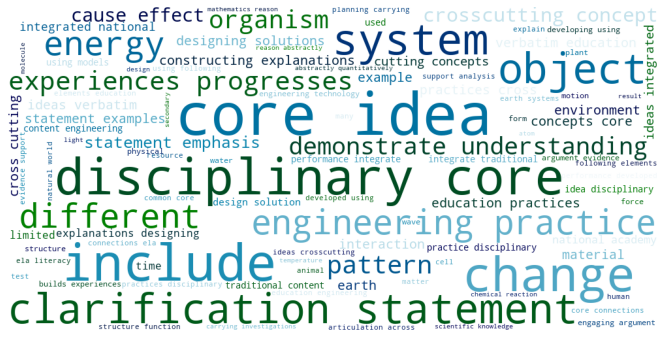

In [199]:
#ngss word cloud 
word_cloud(ngss_processed)

## Word Relationships 
Examine the word relationships within the NGSS corpus. 

In [109]:
#ngss bigram pairs 
print("Bigram Pairs:")
bigram_generator(ngss_processed, 5)

Bigram Pairs:


[(('core', 'ideas'), 0.0073368319152188315),
 (('disciplinary', 'core'), 0.006598053701533602),
 (('clarification', 'statement'), 0.004483619503744841),
 (('experiences', 'progresses'), 0.002904162633107454),
 (('demonstrate', 'understanding'), 0.0025729861924899374)]

In [110]:
#ngss pmi pairs  
print("PMI Pairs:")
pmi_generator(ngss_processed, 100)

PMI Pairs:


[(('clarification', 'statement'), 7.776736275044389),
 (('experiences', 'progresses'), 7.335322976104607),
 (('demonstrate', 'understanding'), 7.2564845884582585),
 (('disciplinary', 'core'), 6.469150278856578),
 (('core', 'ideas'), 5.958722467915493)]

In [111]:
#word ebeddings 
model = gensim.models.Word2Vec([ngss_processed], min_count=100, window=5, 
                               size=150)

- evidence
('scientific', 0.9998186826705933)
('based', 0.9997915029525757)
('multiple', 0.999779462814331)
('model', 0.9997669458389282)
('data', 0.9997454285621643)
('use', 0.9997357130050659)
('natural', 0.9997341632843018)
('specific', 0.9997254610061646)
('support', 0.9997247457504272)
('design', 0.9996926188468933)


- core
('disciplinary', 0.9997736811637878)
('ideas', 0.9997090697288513)
('idea', 0.9996837973594666)
('integrate', 0.9996563792228699)
('education', 0.9996294975280762)
('practices', 0.999579668045044)
('performance', 0.99957674741745)
('concepts', 0.9995226860046387)
('problems', 0.9995091557502747)
('engineering', 0.9994567632675171)


- ideas
('disciplinary', 0.9998058080673218)
('idea', 0.9997430443763733)
('performance', 0.9997353553771973)
('core', 0.9997090697288513)
('education', 0.9996929168701172)
('concepts', 0.9996918439865112)
('practices', 0.9996834993362427)
('engineering', 0.9996787905693054)
('problems', 0.9996462464332581)
('integrate', 0.99958622

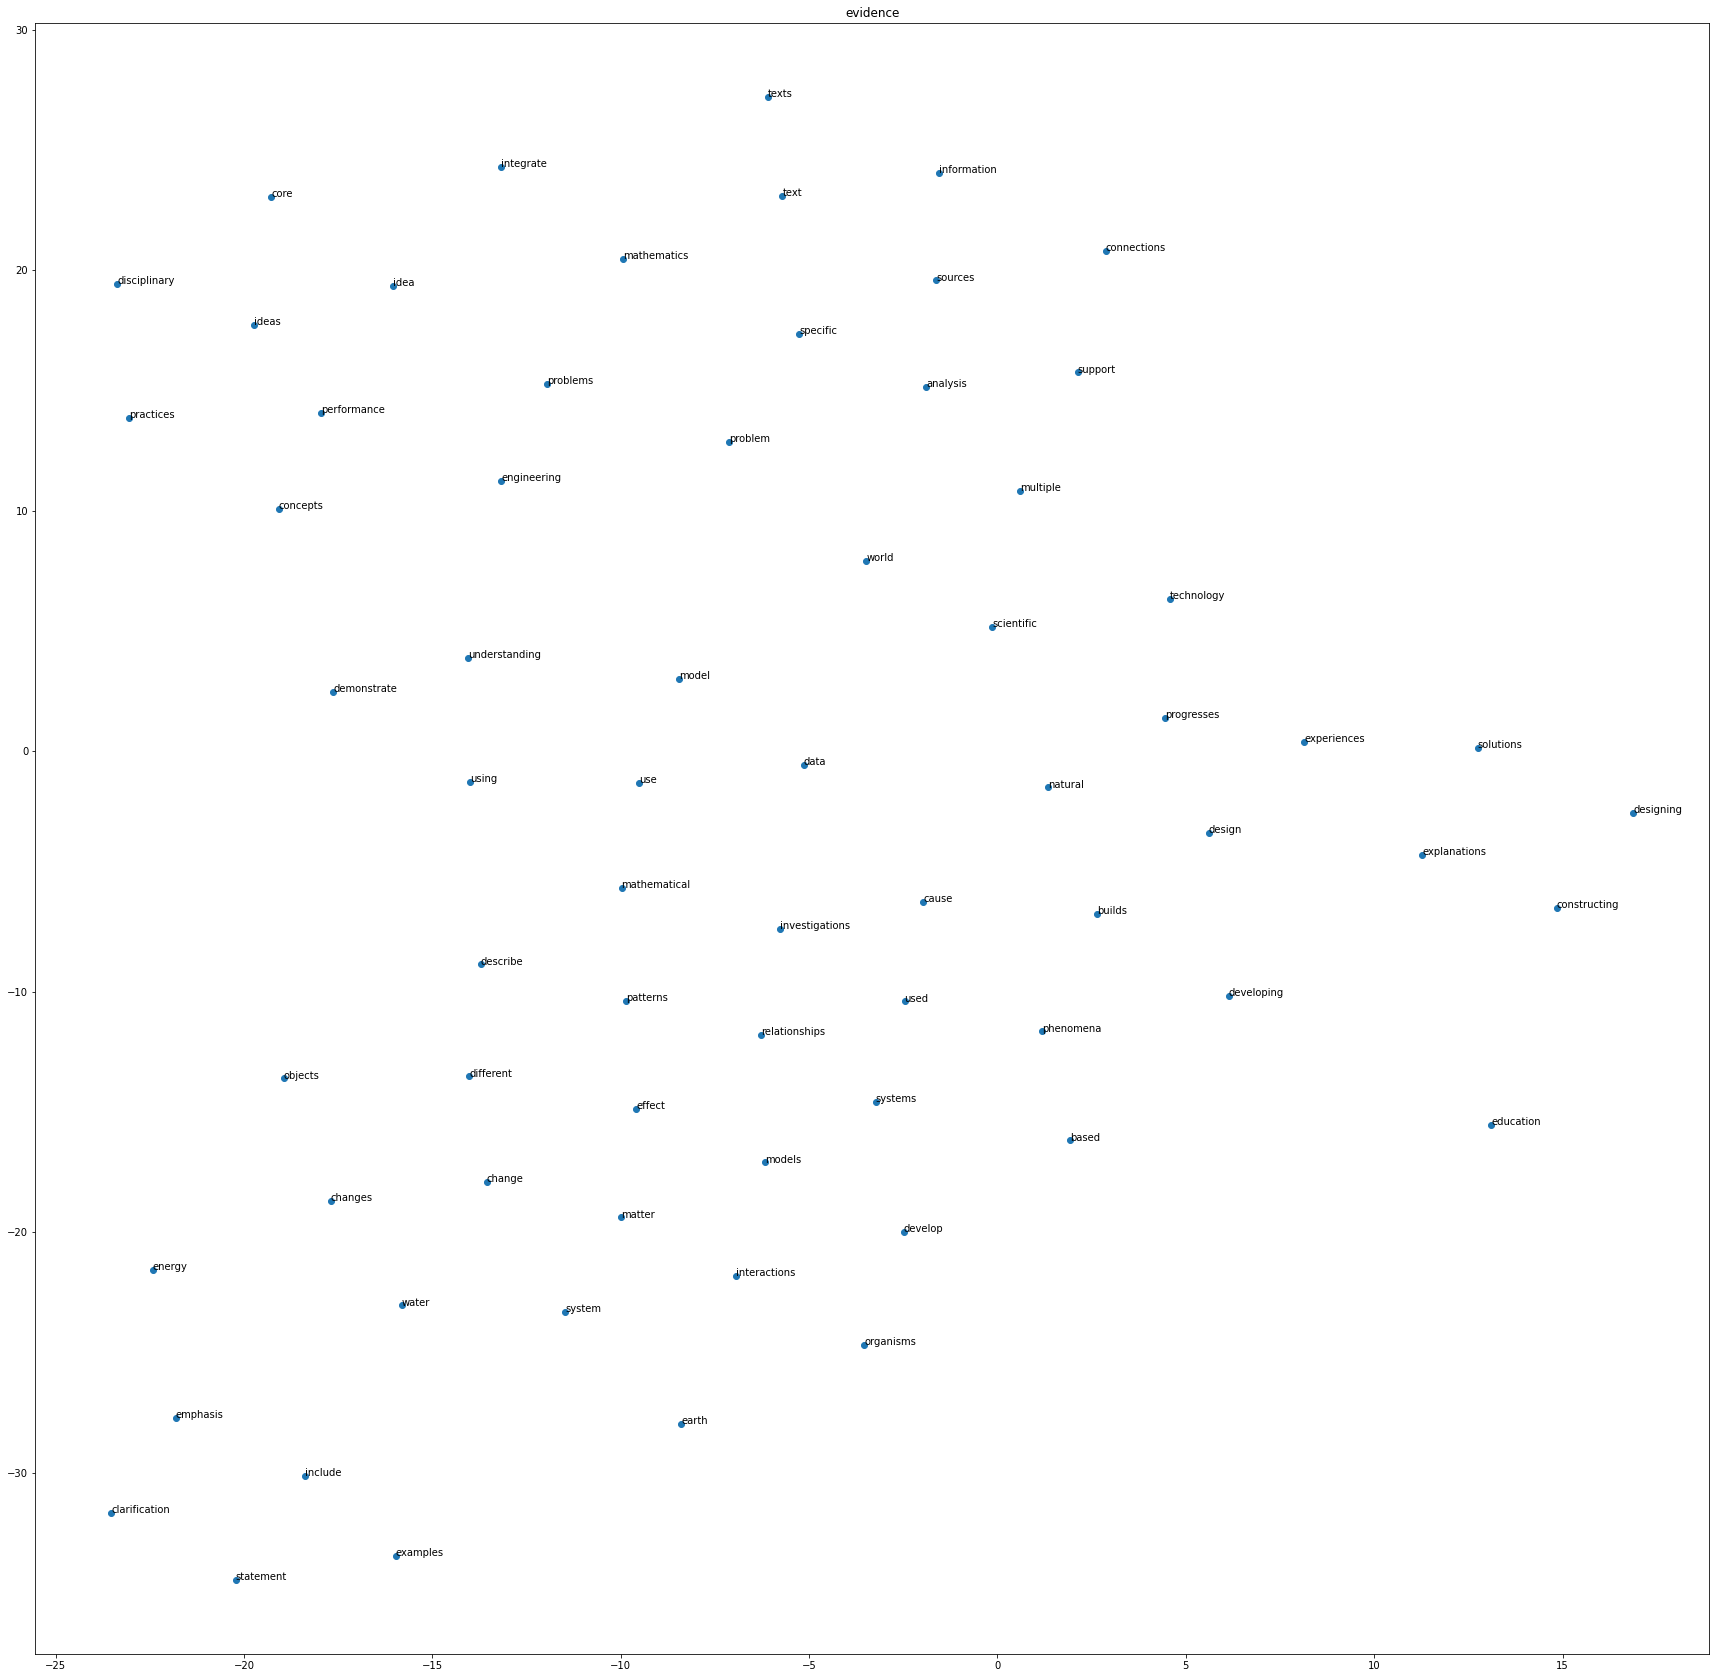

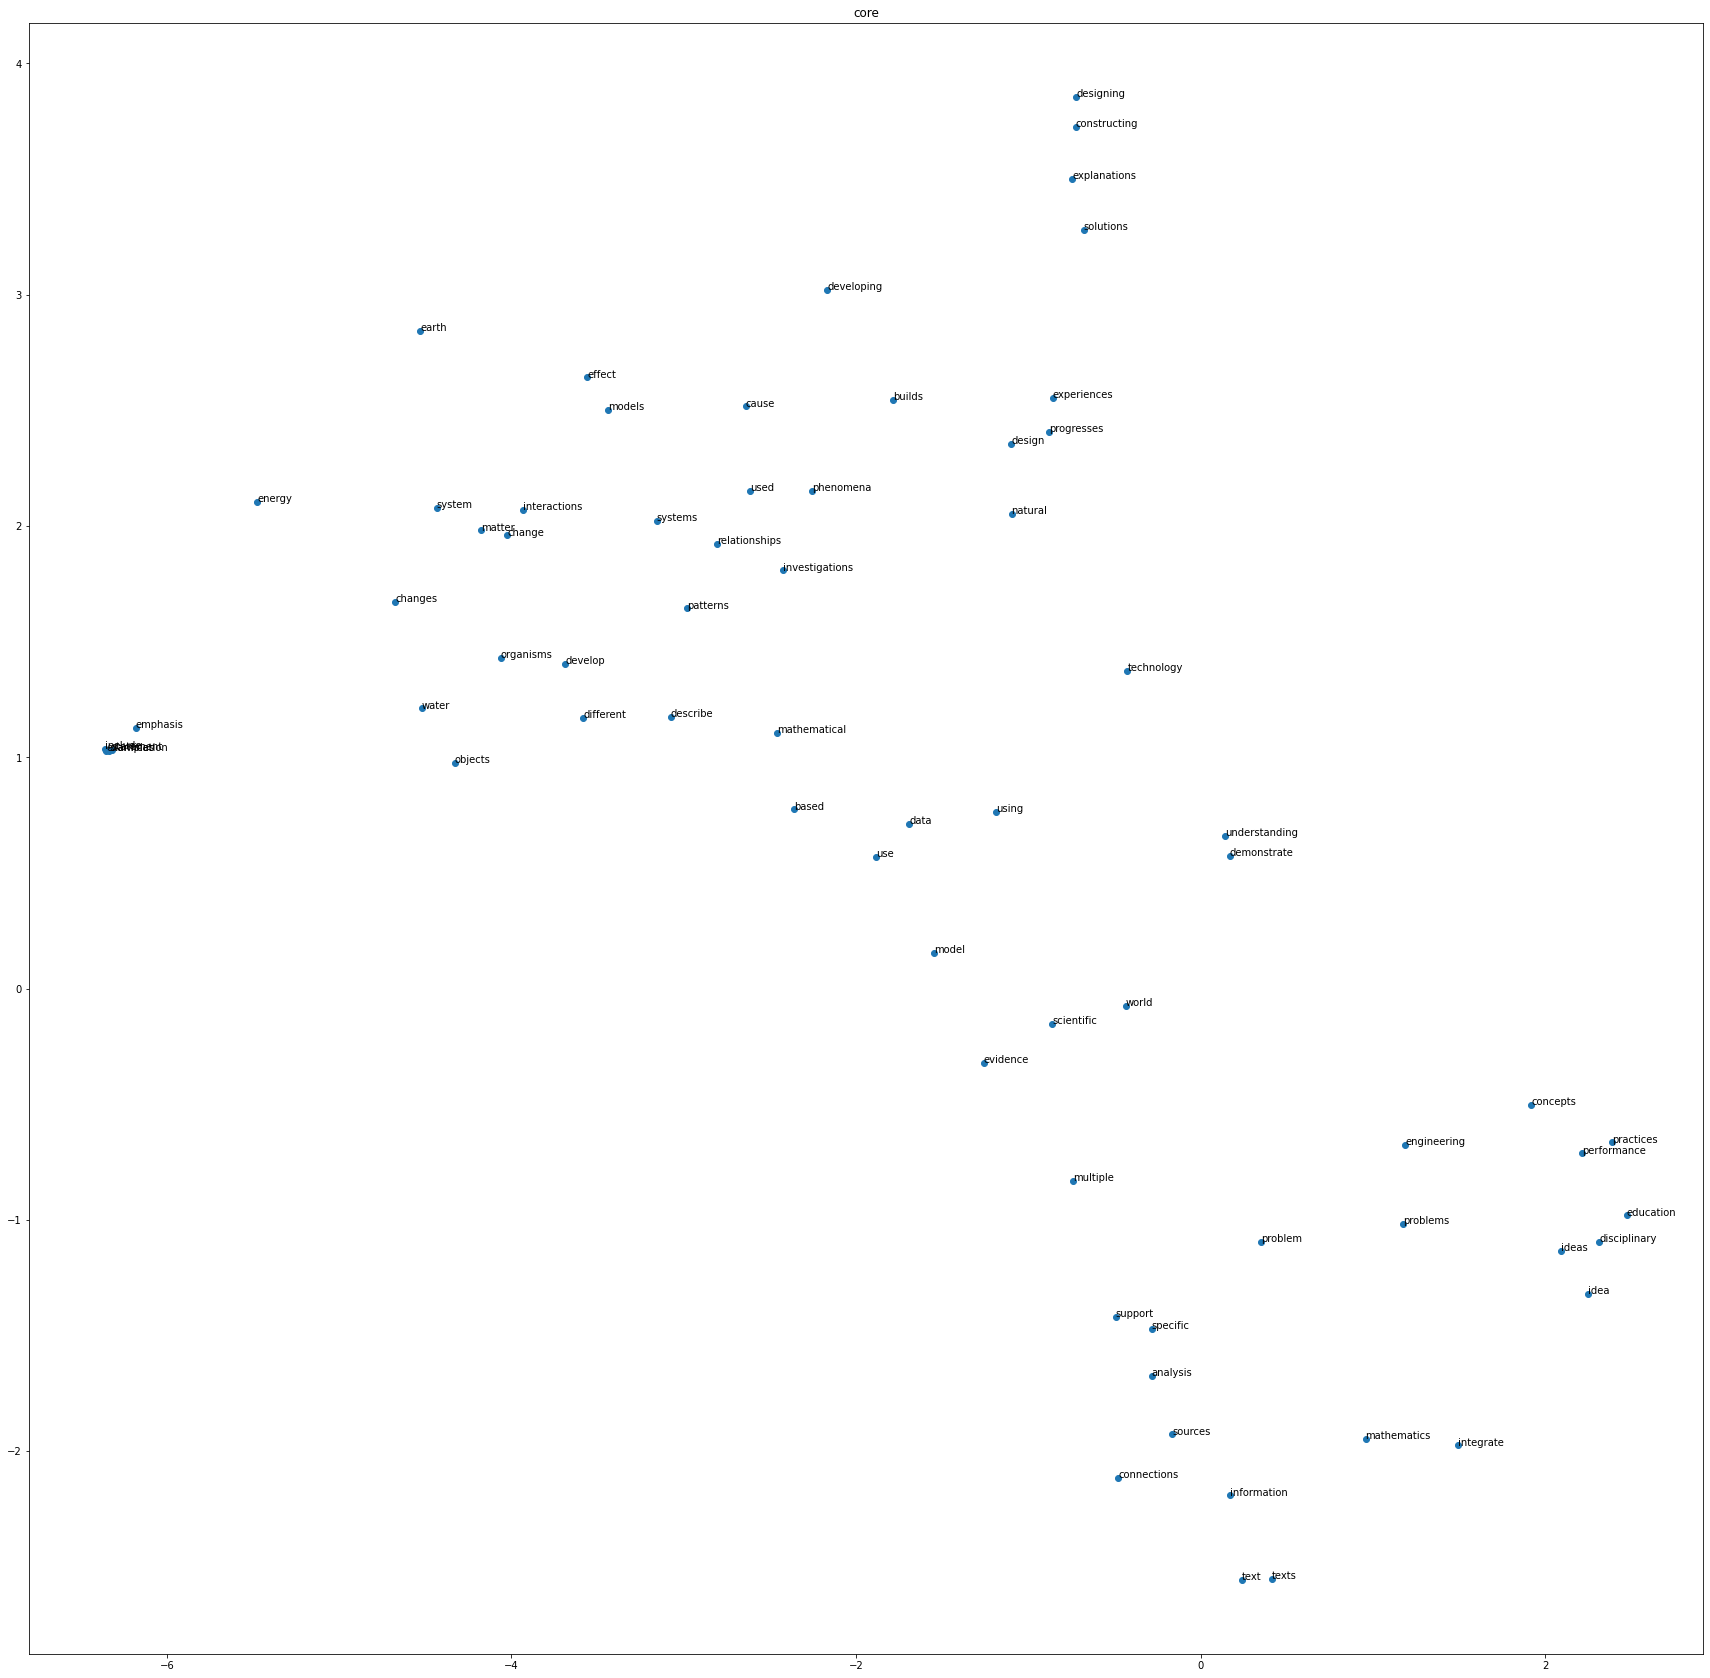

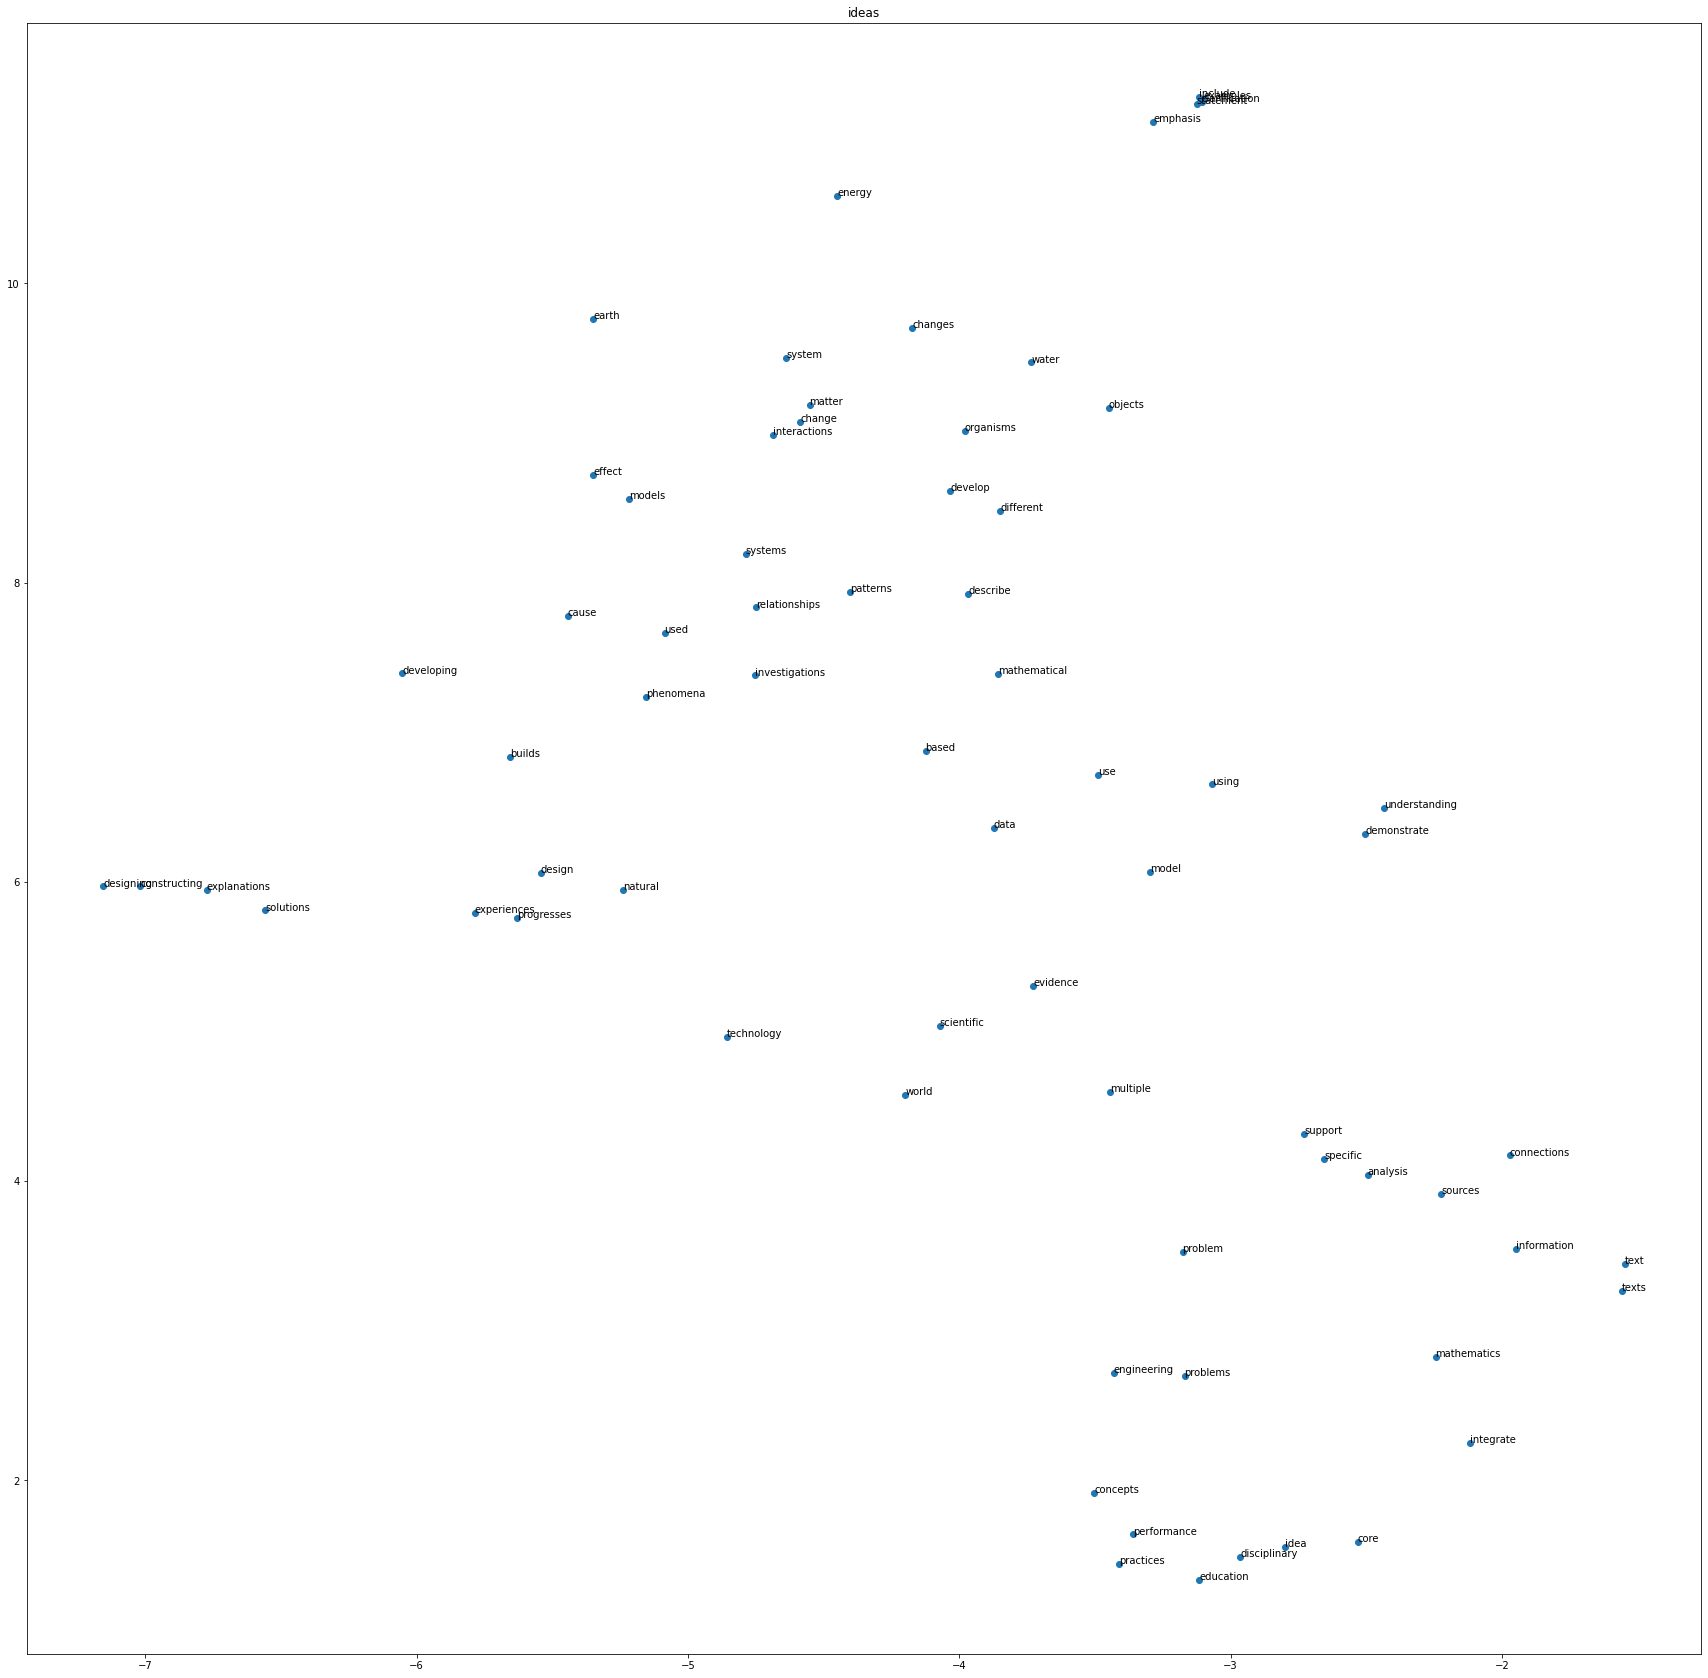

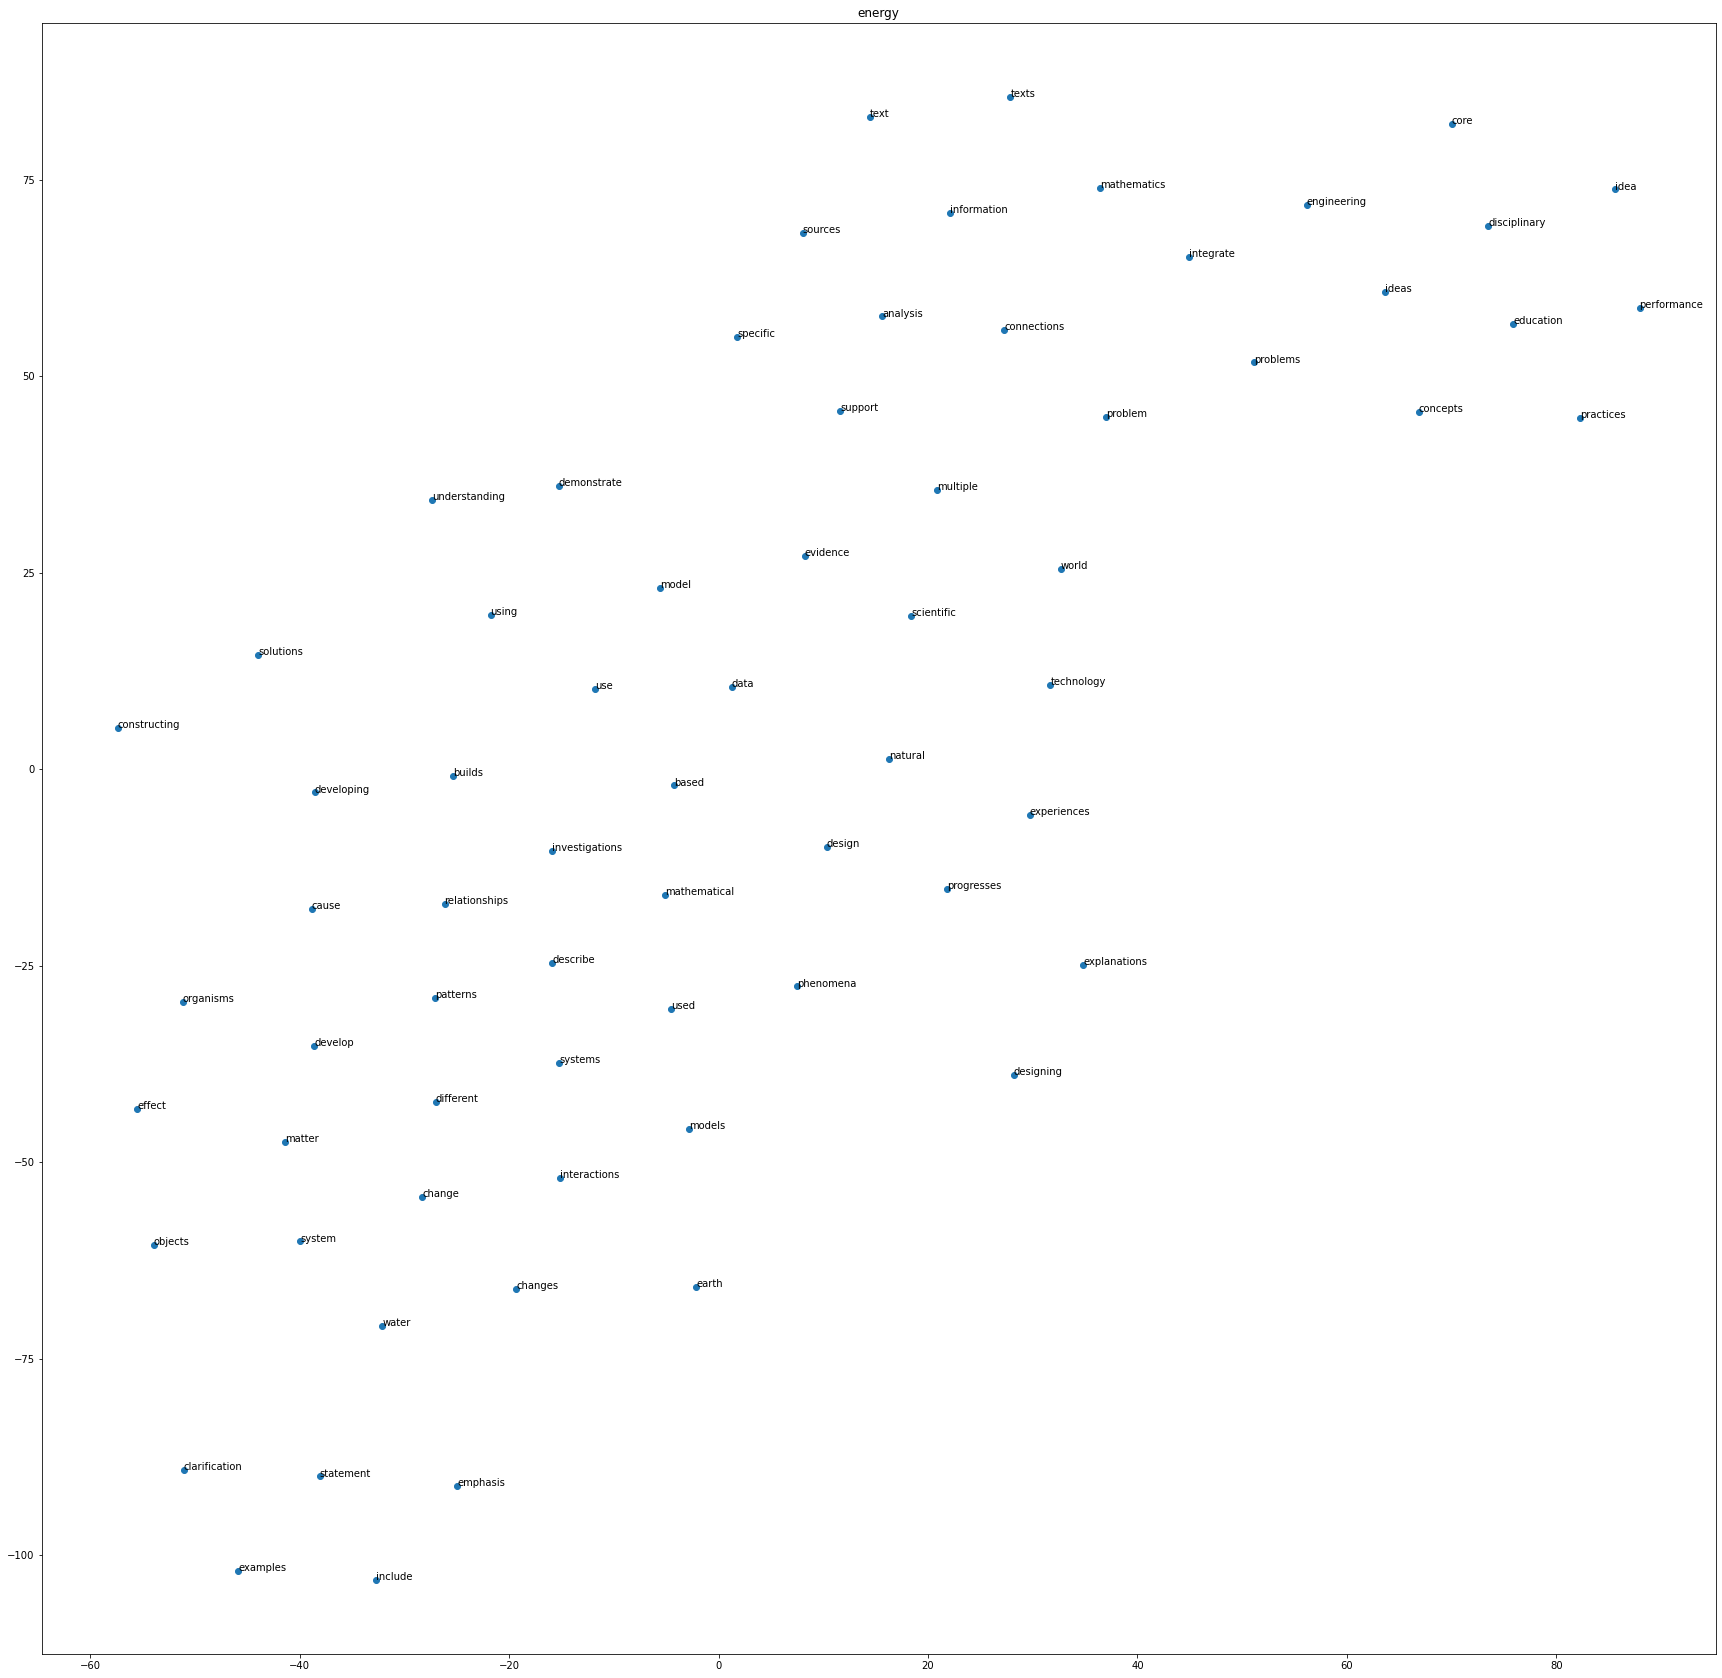

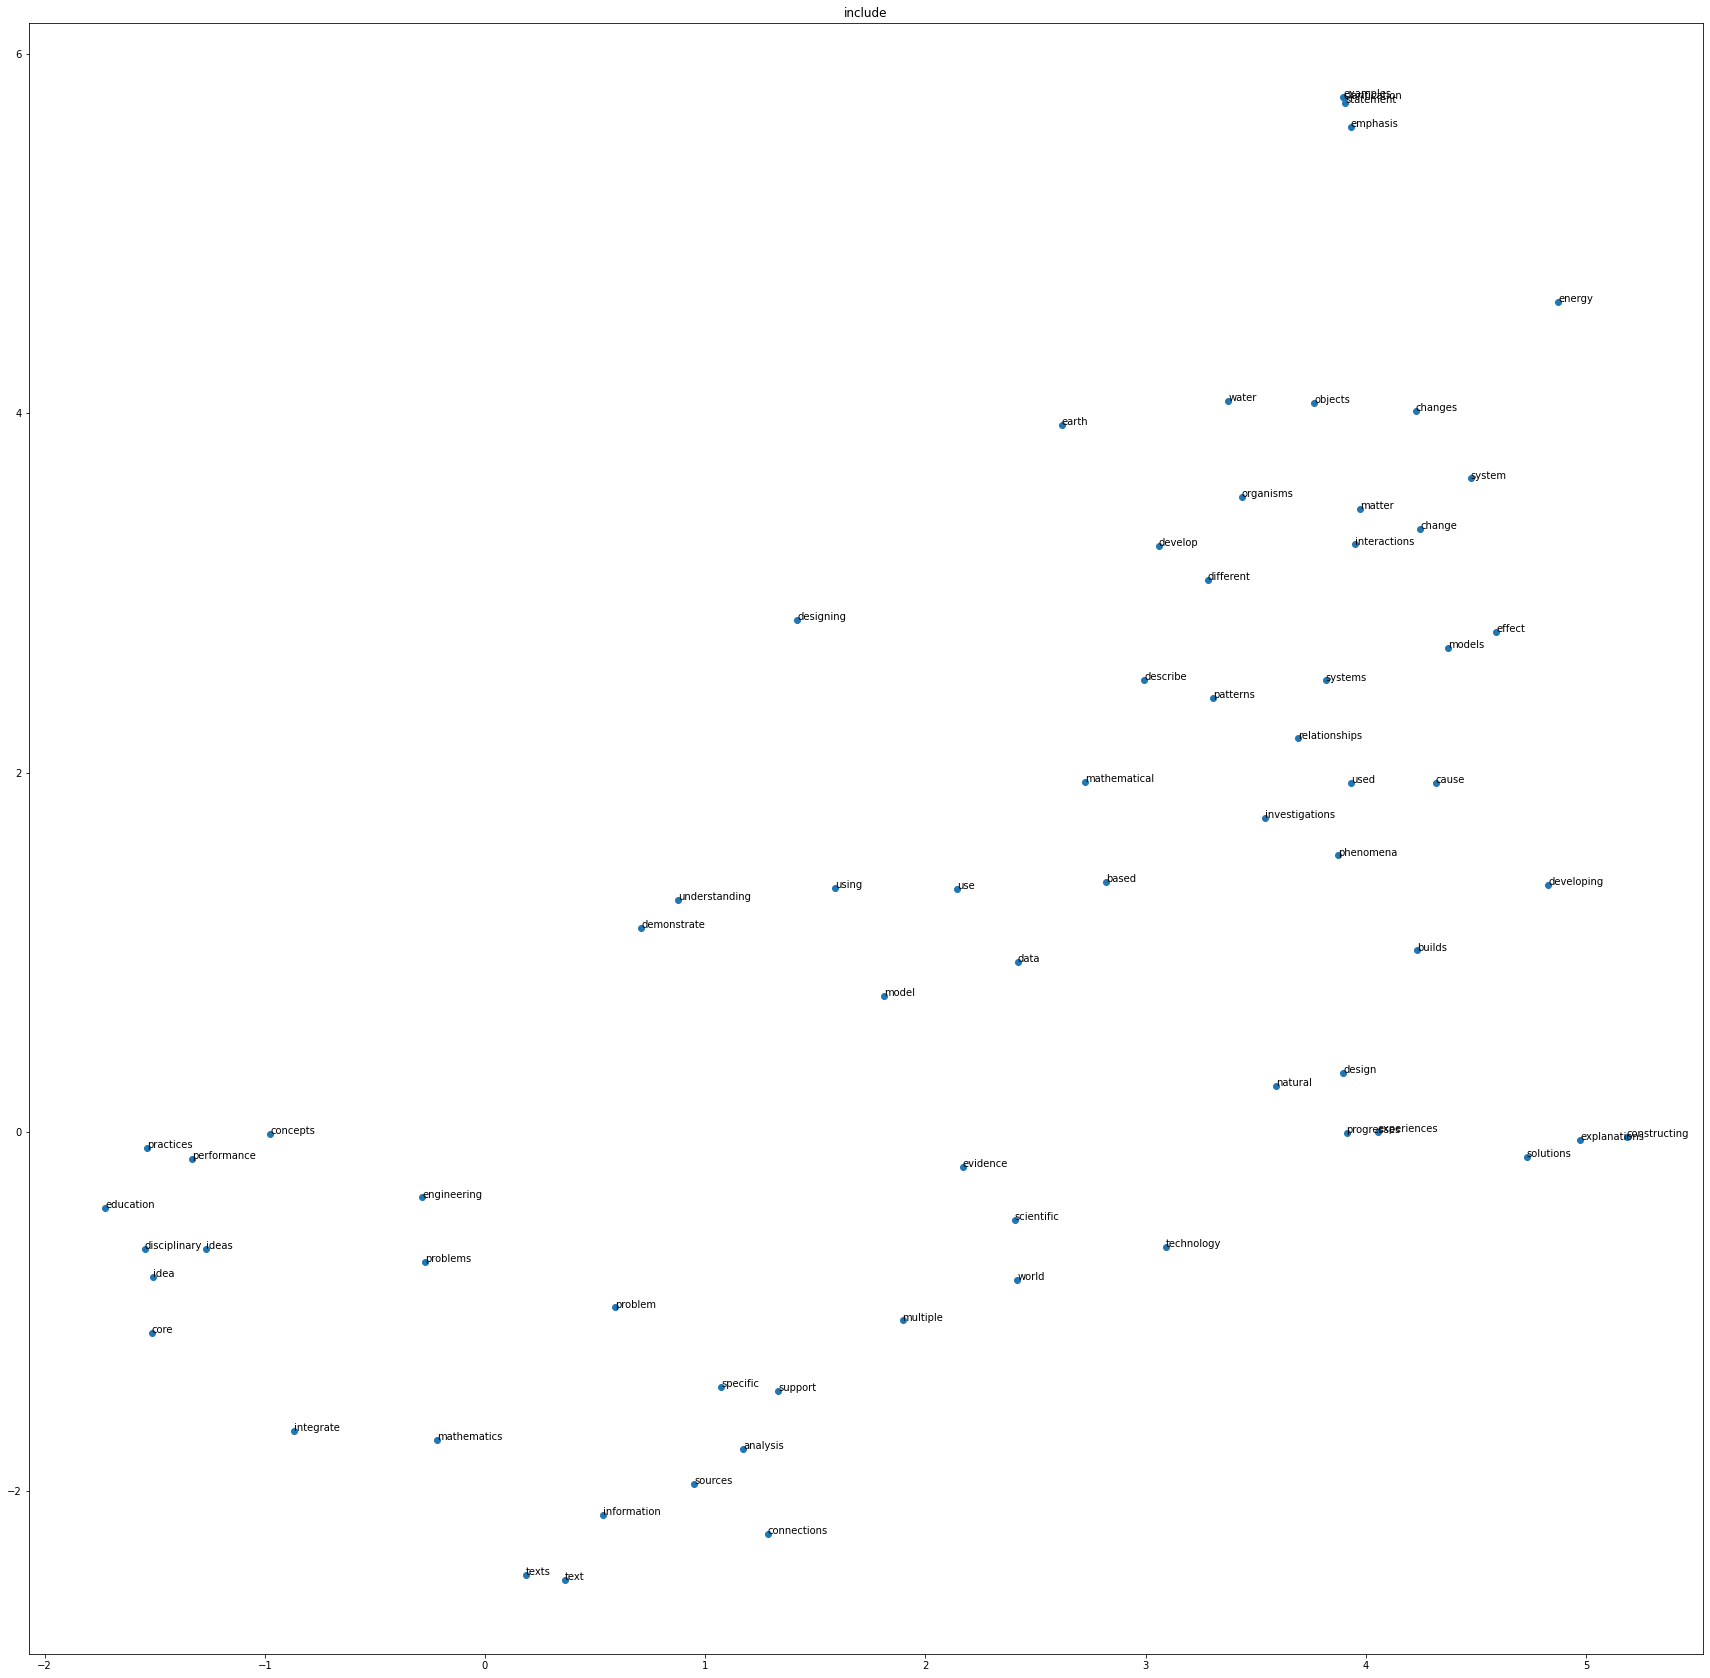

In [112]:
#examine top 10 most similar words 
top_5 = ['evidence', 'core', 'ideas', 'energy','include'] 

for word in top_5: 
    similars = model.wv.similar_by_word(word, topn=10)
    print(f"- {word}", *similars, "\n", sep="\n") 
    
#visualize the density of word relationships
for word in top_5: 
    selected_words = [w[0] for w in model.wv.most_similar(positive=[word], 
                                                          topn=100)]
    embeddings = [model.wv[w] for w in selected_words]

    mapped_embeddings = TSNE(n_components=2, metric='cosine', 
                             init='pca').fit_transform(embeddings) 

    plt.figure(figsize=(30,30)) 
    plt.title(word)
    x = mapped_embeddings[:,0]
    y = mapped_embeddings[:,1]
    plt.scatter(x, y)

    for i, txt in enumerate(selected_words):
        plt.annotate(txt, (x[i], y[i]))

In [113]:
#examine top 10 most dissimilar words 
for word in top_5:  
    dissimilars = model.wv.most_similar(negative=[word])
    #similars = model.wv.similar_by_word(negative = [word], topn=10)
    print(f"- {word}", *dissimilars, "\n", sep="\n") 
    

- evidence
('include', -0.9982132911682129)
('clarification', -0.9983896613121033)
('examples', -0.9983925819396973)
('core', -0.9985081553459167)
('statement', -0.9985151886940002)
('disciplinary', -0.9985830783843994)
('education', -0.9986339211463928)
('emphasis', -0.9986671805381775)
('energy', -0.9986913800239563)
('practices', -0.9986966848373413)


- core
('include', -0.9957818984985352)
('energy', -0.9959942698478699)
('examples', -0.996159017086029)
('statement', -0.9962085485458374)
('clarification', -0.9962236881256104)
('emphasis', -0.9964993000030518)
('designing', -0.9971063137054443)
('constructing', -0.99721759557724)
('changes', -0.997255802154541)
('system', -0.9973052144050598)


- ideas
('include', -0.9967221021652222)
('energy', -0.9969644546508789)
('examples', -0.9970490336418152)
('statement', -0.9970548748970032)
('clarification', -0.9970840811729431)
('emphasis', -0.9973679184913635)
('designing', -0.9977766275405884)
('constructing', -0.9979328513145447)
('ch

This follows intuitive and domain knowledge of word associations. The most similar words in to evidence are - based, scientific, multiple, connections, data, analysis, support, world, specific, problem. The scorings on the dissimilar words are a little less intuitive and do not seem to shed any immediate light onto the text.

## EDA Visuals 
Stylized, presentation graphs of high frequency words.

In [114]:
#Graphing of the most frequent ngss words  

x=['Using/Use', 'Evidence', 'Core', 'Ideas', 'Energy', 'Include', 
   'Information', 'Engineering', 'Data']
fig = go.Figure(go.Bar(x=x, y=[606, 467,438,415,389, 305, 302, 299, 292], 
                marker_color='rgb(75, 117, 156)',
                text=[606, 467,438,415,389, 305, 302, 299, 292],
                textposition='auto')) 

fig.update_layout(
    title='Highest Frequency Words in the NGSS Standards',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Number of Uses',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1)

fig.show() 

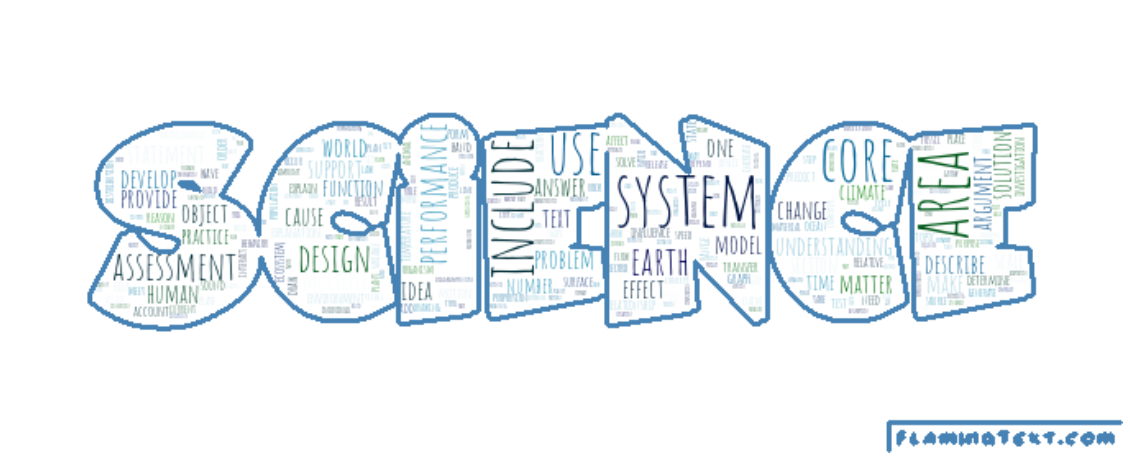

In [198]:
#stylized word cloud 
font_path = 'Images/AmaticSC-Regular.ttf' 
custom_mask = np.array(Image.open("Images/science.png"))
wc_string = (" ").join(ngss_generalclean_freqdist)

wc = WordCloud(stopwords=STOPWORDS, font_path = font_path, 
               mask=custom_mask, contour_width=2, 
               contour_color='steelblue', colormap="ocean", 
               background_color="white", max_words=1000,
               max_font_size=300, random_state=42, 
               width= 500, height= 400) 


wc.generate(wc_string) 
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

## Clustering NGSS Standards  
Use KMeans clustering to group the NGSS standards corpus and identify the word centroids for each cluster.

In [116]:
#ngss processed and tokenized 
len(ngss_processed)

39254

In [117]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=200000, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix_ngss = tfidf_vectorizer.fit_transform(ngss_processed) 

print(tfidf_matrix_ngss.shape)

(39254, 3224)


In [118]:
#term names
terms = tfidf_vectorizer.get_feature_names() 

Background knowledge would predict that 3-5 clusters will be the best fit. 

In [119]:
k_means_3 = KMeans(n_clusters=3).fit(tfidf_matrix_ngss)
k_means_4 = KMeans(n_clusters=4).fit(tfidf_matrix_ngss)
k_means_5 = KMeans(n_clusters=5).fit(tfidf_matrix_ngss)
k_means_6 = KMeans(n_clusters=6).fit(tfidf_matrix_ngss)
k_means_7 = KMeans(n_clusters=7).fit(tfidf_matrix_ngss)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [120]:
CH_score = []

for m in k_list:
    labels = m.labels_
    CH_score.append(calinski_harabasz_score(tfidf_matrix_ngss.toarray(), 
                                            labels))

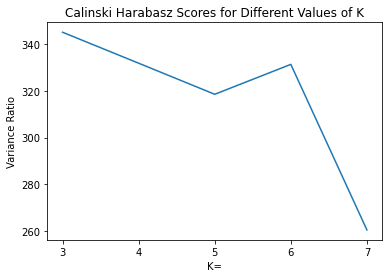

In [121]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [122]:
wcss_score = []

for m in k_list:
    labels = m.labels_
    wcss_score.append(m.inertia_)

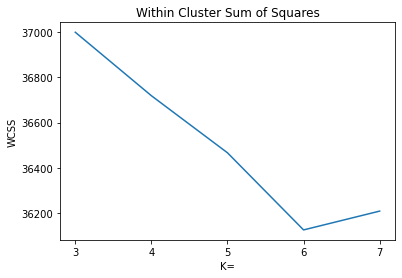

In [123]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

Looks like there is a sharp decline at 4 clusters with the Calinski test and a smaller elbow on the cluster Sum, domain knowledge indicates that 4 is also a good cluster number choice given that the science standards are normally grouped into 3-4 categories depending on the corpus. 

In [124]:
#create and fit a model
km = KMeans(n_clusters=4)

km.fit(tfidf_matrix_ngss) 
predicted_clusters = km.predict(tfidf_matrix_ngss)

clusters = km.labels_.tolist() 

Look at a list of words in each cluster, which should start to inform theme in our clusters. 

In [125]:
vectorizer = TfidfVectorizer()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, :1]:
        print(' %s' % terms[ind]), 
    print

Top terms per cluster:
Cluster 0:
 evidence
Cluster 1:
 ideas
Cluster 2:
 natural
Cluster 3:
 performance


In [126]:
ngss_cluster_list = pd.DataFrame({'cluster': predicted_clusters, 
                                  'word': clusters})
ngss_cluster_list['cluster'].value_counts() 

0    38327
1      415
2      268
3      244
Name: cluster, dtype: int64

Based on these clusters it seems that three out of the four are about the teaching/ implementing process and only one is a topic (matter - is a physical science key word). This clustering is just on the intra text information, so highlighting a theme within the text, given context themes might include content and/ or explanation on process and instruction. I will apply a similar technique to inter text exploration but intra text clustering could be useful for an organization to better understand what the major themes are.  

## Classify Standards by Topic 
Use supervised learning techniques to predict a standards topic category based on it's description.

In [127]:
#ngs standards, decriptions and dci
standard_df = pickle.load(open("Pickles/ngsstandards.p", "rb" )) 
standard_df.head()

,dci,standard,tag
0,Motion and Stability: Forces and Interactions,Plan and conduct an investigation to compare t...,K-PS2-1
1,Motion and Stability: Forces and Interactions,Analyze data to determine if a design solution...,K-PS2-2
2,From Molecules to Organisms: Structures and Pr...,Use observations to describe patterns of what ...,K-LS1-1
3,Earth's Systems,Use and share observations of local weather co...,K-ESS2-1
4,Earth's Systems,Construct an argument supported by evidence fo...,K-ESS2-2


In [128]:
#examine unique standards
standard_df['dci'].unique()

array(['Motion and Stability: Forces and Interactions',
       'From Molecules to Organisms: Structures and Processes',
       "Earth's Systems", 'Earth and Human Activity',
       'Waves and Their Applications in Technologies for Information Transf',
       'Heredity: Inheritance and Variation of Traits',
       "Earth's Place in the Univers", 'Matter and Its Interactions',
       'Ecosystems: Interactions, Energy, and Dynamics',
       'Biological Evolution: Unity and Diversity', 'Engineering Design',
       'From molecules to Organisms: Structures and Processes', 'Energy',
       'Matter and its Interactions',
       'Waves and their Applications in Technologies for Information Transf',
       'Ecosystems:  Interactions, Energy, and Dynamics'], dtype=object)

In [129]:
#map a generalized label to the specific categories
generalized = {'Motion and Stability: Forces and Interactions': 'PS', 
               'From Molecules to Organisms: Structures and Processes' : 'PS',
               "Earth's Systems" : 'ES',
               'Earth and Human Activity' : 'ES',
               'Waves and Their Applications in Technologies for Information Transf' : 'PS',
               'Heredity: Inheritance and Variation of Traits': 'LS',
               "Earth's Place in the Universe" : 'ES', 
               'Matter and Its Interactions': 'ES',
               'Ecosystems: Interactions, Energy, and Dynamics': 'LS',
               'Biological Evolution: Unity and Diversity': 'LS',
               'Engineering Design': 'PS',
               'From molecules to Organisms: Structures and Processes' : 'LS', 
               'Energy': 'PS',
               'Matter and its Interactions': 'PS',
               'Waves and their Applications in Technologies for Information Transf': 'PS',
               'Ecosystems:  Interactions, Energy, and Dynamics': 'LS'}

standard_df["topic"] = standard_df["dci"].map(generalized)  

#drop nan values
standard_df = standard_df.dropna()

#create a topic id column
standard_df['topic_id'] = standard_df['topic'].factorize()[0]  

category_id_df = standard_df[['topic', 'topic_id']].drop_duplicates() \
                                                    .sort_values('topic_id') 
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['topic', 'topic_id']].values)

standard_df.head()

,dci,standard,tag,topic,topic_id
0,Motion and Stability: Forces and Interactions,Plan and conduct an investigation to compare t...,K-PS2-1,PS,0
1,Motion and Stability: Forces and Interactions,Analyze data to determine if a design solution...,K-PS2-2,PS,0
2,From Molecules to Organisms: Structures and Pr...,Use observations to describe patterns of what ...,K-LS1-1,PS,0
3,Earth's Systems,Use and share observations of local weather co...,K-ESS2-1,ES,1
4,Earth's Systems,Construct an argument supported by evidence fo...,K-ESS2-2,ES,1


In [130]:
standard_df['standard'][3]

'Use and share observations of local weather conditions to describe patterns over time.'

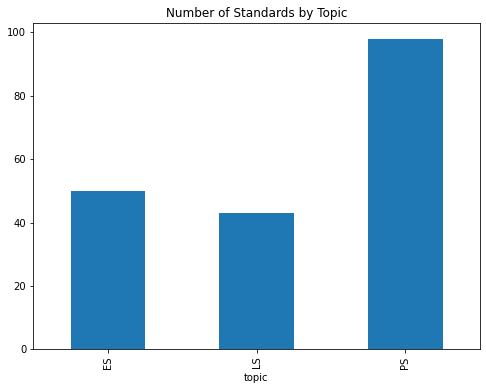

In [131]:
#visualze class distribution 
fig = plt.figure(figsize=(8,6))
standard_df.groupby('topic').topic.count().plot.bar() 
plt.title('Number of Standards by Topic') 
plt.show()

In [132]:
#vectorize the text and create features & labels
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')
features = tfidf.fit_transform(standard_df.standard).toarray()
labels = standard_df.topic
features.shape

(191, 147)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(standard_df['standard'], 
                                                    standard_df['topic'],
                                                    random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

Now that the model has been fit, predict values that are not exact standard strings which classify well with at least one domain key word. (ie. 'energy', 'life', ect.)

In [134]:
print(clf.predict(count_vect.transform(["Use energy"])))

['PS']


Evaluating a variety of models on their preformance scores (accuracy).

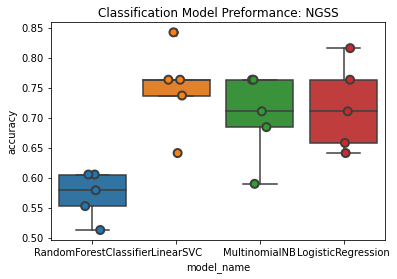

In [135]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] 

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, 
                               scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
                  entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, \
                         columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2) \
              .set_title('Classification Model Preformance: NGSS')
plt.show()

In [136]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.749258
LogisticRegression        0.717679
MultinomialNB             0.702159
RandomForestClassifier    0.570985
Name: accuracy, dtype: float64

The LinearSVC model preformed the best although the LogisticRegrssion Model and MultinomialNB model preformed well also (above 70%).

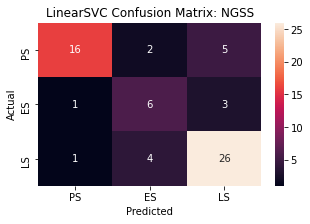

In [137]:
#evaluate the LinearSVC model 
modelsvc= LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = \
                                train_test_split(features, labels, 
                                                 standard_df.index, 
                                                 test_size=0.33, 
                                                 random_state=0)
modelsvc.fit(X_train, y_train)
y_pred = modelsvc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred) 

fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.topic.values,
            yticklabels=category_id_df.topic.values)
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('LinearSVC Confusion Matrix: NGSS')
plt.show()

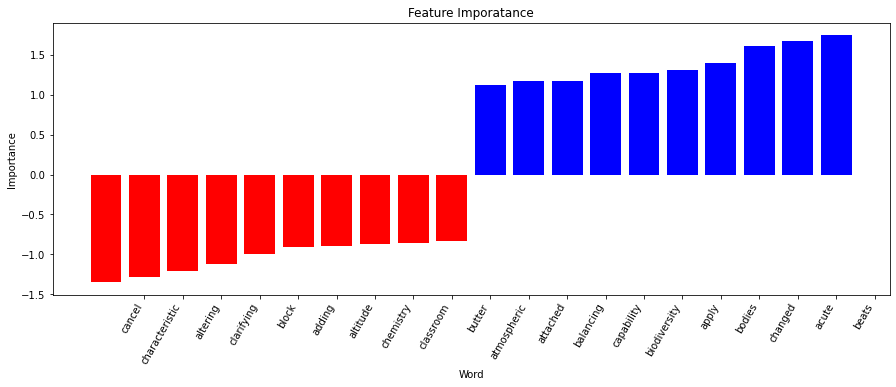

In [138]:
plot_coefficients(modelsvc, terms)

# Indiana Standards 

## Text Processing 
Each state's standards have been converted to txt file and will be cleaned generically but treated and processed individually. The same functions and process applied to the NGSS standard are applied below. 

In [139]:
#state file
us_states = ['TXTfiles/indiana']

-Txtfiles/Indiana
('ideas', 203)
('data', 193)
('engineering', 187)
('scientists', 187)
('engineers', 187)
('describe', 181)
('models', 174)
('identify', 158)
('use', 158)
('seps', 156)


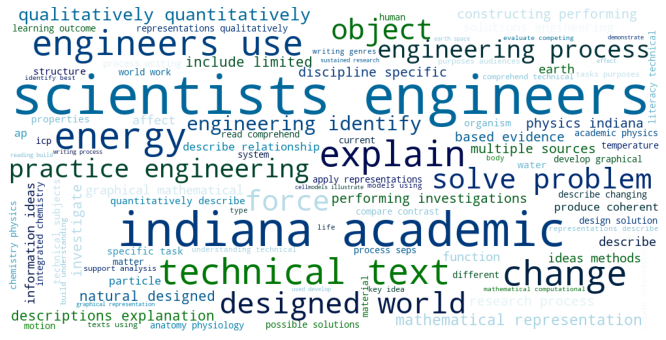

In [226]:
#create frequency list and word cloud for each state 
cleaned_words = [] 
top_words = [] 
top_25 = [] 
to_vecotrize = []
document_lenght = [] 
all_words = []

for state_name in us_states: 
    state = open_and_flatten(state_name) 
    cleaned_words.append([state_name, state])
    #look at the top 50 words on general process ngss  
    generalclean_freqdist = FreqDist(state)   
    print(f"-{state_name.title()}", *generalclean_freqdist.most_common(10), 
          sep="\n")  
    document_lenght.append(len(state))
    top_words.append([state_name, generalclean_freqdist.most_common(10)]) 
    top_25.append([state_name, generalclean_freqdist.most_common(25)])  
    all_words.append([state_name, generalclean_freqdist.most_common(21511)])
    to_vecotrize.append(state)
    word_cloud(state) 

In [141]:
#lenght of all state documents
sum(document_lenght)

21511

## Word Relationships 
Examine the word relationships within the corpus. 

In [142]:
#aligned bigram pairs and pmi pairs for each state
for state_name in us_states:  
    state = open_and_flatten(state_name) 
    print(f"-{state_name.title()}", "\n",  
          "Bigrams:", *bigram_generator(state, 10)[:5], "\n", 
          "PMI:", *pmi_generator(state, 10)[:5], "\n\n", sep="\n")

-Txtfiles/Indiana


Bigrams:
(('scientists', 'engineers'), 0.008693226721212402)
(('indiana', 'academic'), 0.006508298080052067)
(('engineers', 'use'), 0.0031611733531681464)
(('technical', 'texts'), 0.00306819766631026)
(('designed', 'world'), 0.00223141648458928)


PMI:
(('apa', 'cse'), 10.93335535501327)
(('avoiding', 'plagiarism'), 10.93335535501327)
(('citation', 'apa'), 10.93335535501327)
(('documents', 'planning'), 10.93335535501327)
(('drafting', 'revising'), 10.93335535501327)





In [143]:
#indiana 
indiana = cleaned_words[0][1]

#word ebeddings 
indiana_model = gensim.models.Word2Vec([indiana], min_count=5, window=5, 
                               size=150)  

#examine top 10 most similar words  
indiana_top_5 = ['ideas', 'engineering', 'data', 'scientists','describe'] 

for word in indiana_top_5: 
    similars = indiana_model.wv.similar_by_word(word, topn=10)
    print(f"-{word}", *similars, "\n", sep="\n") 

-ideas
('explain', 0.9999017715454102)
('including', 0.999894380569458)
('technical', 0.9998854994773865)
('within', 0.999885082244873)
('content', 0.999883770942688)
('specific', 0.9998835921287537)
('text', 0.9998828172683716)
('es', 0.9998812675476074)
('information', 0.9998790621757507)
('energy', 0.9998744130134583)


-engineering
('content', 0.9998329877853394)
('explain', 0.9998271465301514)
('ideas', 0.9998153448104858)
('es', 0.9998151659965515)
('process', 0.9998145699501038)
('information', 0.9998118281364441)
('technical', 0.999809980392456)
('specific', 0.9998098611831665)
('determine', 0.9998093247413635)
('use', 0.9998081922531128)


-data
('energy', 0.9998677968978882)
('including', 0.9998610019683838)
('explain', 0.9998549818992615)
('ideas', 0.9998547434806824)
('env', 0.9998500347137451)
('information', 0.9998460412025452)
('use', 0.9998445510864258)
('sources', 0.9998413324356079)
('text', 0.9998356103897095)
('explanations', 0.9998352527618408)


-scientists
('ener

## EDA Visuals 
Stylized, presentation graphs of high frequency words.

In [144]:
for count, value in enumerate(top_25): 
    graph_high_frequency_words(top_25, count, value[0]) 

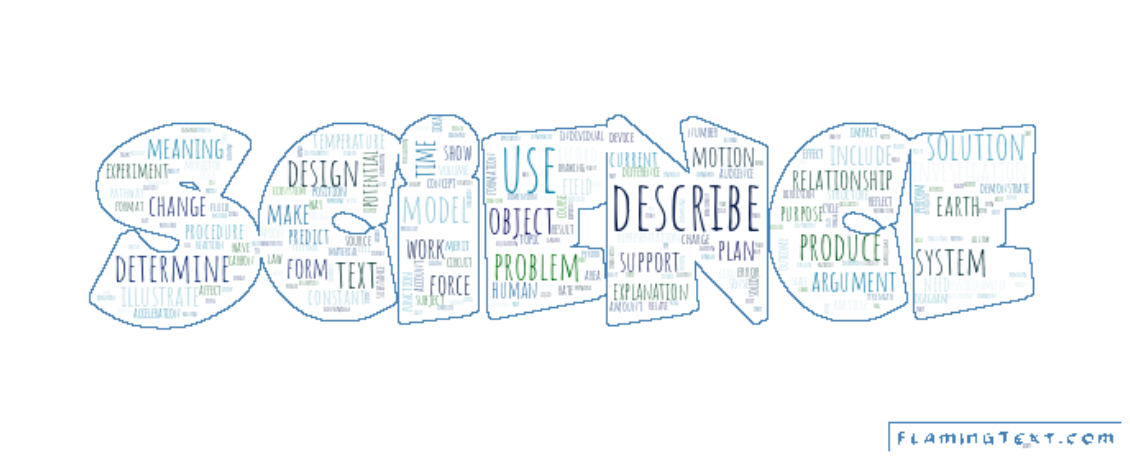

In [145]:
#stylized word cloud 
font_path = 'Images/AmaticSC-Regular.ttf' 
custom_mask = np.array(Image.open("Images/science.png"))
wc_string = (" ").join(generalclean_freqdist)

wc = WordCloud(stopwords=STOPWORDS, font_path = font_path, 
               mask=custom_mask, contour_width=.5, 
               contour_color='steelblue', colormap="ocean", 
               background_color="white", max_words=1000,
               max_font_size=300, random_state=42, 
               width= 1000, height= 900) 


wc.generate(wc_string) 
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

## Clustering Indiana Standards 
Use KMeans clustering to group standards corpus and identify the word centroids for each cluster.

In [157]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=200000, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix_aligned = tfidf_vectorizer.fit_transform(cleaned_words[0][1]) 

print(tfidf_matrix_aligned.shape)

(21511, 2200)


In [152]:
#term names 
terms_aligned = tfidf_vectorizer.get_feature_names() 

In [158]:
#create and fit a model
kma = KMeans(n_clusters=5)

kma.fit(tfidf_matrix_aligned)  

predicted_clusters = kma.predict(tfidf_matrix_aligned)

clusters_aligned = kma.labels_.tolist() 

In [160]:
vectorizer = TfidfVectorizer()

print("Top terms per cluster:")
order_centroids = kma.cluster_centers_.argsort()[:, ::-1] 

for i in range(5):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, :1]:
        print(' %s' % terms_aligned[ind]), 
    print

Top terms per cluster:
Cluster 0:
 data
Cluster 1:
 constructing
Cluster 2:
 ideas
Cluster 3:
 indiana
Cluster 4:
 solutions


# Comparing State & NGSS Standards
Examine the highest frequency words from each of the standards corpus to identify any patterns and which words are most prevalent across all standards. 

## Comparing NGSS Top Words to Indiana

In [222]:
#highest frequency indiana words 
top_words

[['TXTfiles/indiana',
  [('ideas', 203),
   ('data', 193),
   ('engineering', 187),
   ('scientists', 187),
   ('engineers', 187),
   ('describe', 181),
   ('models', 174),
   ('identify', 158),
   ('use', 158),
   ('seps', 156)]]]

In [219]:
#highest frequency ngss words
ngss_top25

[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('systems', 284),
 ('natural', 268),
 ('disciplinary', 262),
 ('models', 259),
 ('solutions', 254),
 ('performance', 244),
 ('earth', 239),
 ('concepts', 232),
 ('scientific', 216),
 ('design', 215),
 ('connections', 206),
 ('understanding', 201),
 ('explanations', 200),
 ('system', 197),
 ('practices', 192),
 ('matter', 179)]

In [228]:
ngss_words = ['evidence', 'core', 'ideas', 'energy', 'include', 'using', 
              'information', 'engineering','use', 'data','systems', 
              'natural', 'disciplinary', 'models', 'solutions', 'performance', 
              'earth', 'concepts', 'scientific','design', 'connections', 
              'understanding', 'explanations', 'system', 'practices', 
              'matter'] 

indiana_words = []
for word in ngss_words: 
    filter_object = filter(lambda a: word in a, all_words[0][1]) 
    indiana_words.append(filter_object)
    print(list(filter_object))

[('evidence', 138)]
[('core', 20)]
[('ideas', 203)]
[('energy', 98)]
[('include', 51)]
[('using', 137)]
[('information', 151)]
[('engineering', 187)]
[('use', 158)]
[('data', 193)]
[('systems', 69)]
[('natural', 79)]
[]
[('models', 174)]
[('solutions', 123)]
[]
[('earth', 46)]
[('concepts', 12)]
[('scientific', 47)]
[('design', 84)]
[]
[('understanding', 63)]
[('explanations', 130)]
[('system', 82)]
[]
[('matter', 25)]


In [257]:
words = ['evidence', 'core', 'ideas', 'energy', 'include', 'using', 
              'information', 'engineering','use', 'data','systems', 
              'natural', 'disciplinary', 'models', 'solutions', 'performance', 
              'earth', 'concepts', 'scientific','design', 'connections', 
              'understanding', 'explanations', 'system', 'practices', 
              'matter'] 

fig = go.Figure()
fig.add_trace(go.Bar(x=words,
                y=[467, 438, 415, 389, 305, 304, 302, 299, 296, 292, 284, 268,
                   262, 259, 254, 244, 239, 232, 216, 215, 206, 201, 200, 197, 
                   192, 179],  
                text=[467, 438, 415, 389, 305, 304, 302, 299, 296, 292, 284, 268,
                   262, 259, 254, 244, 239, 232, 216, 215, 206, 201, 200, 197, 
                   192, 179], 
                name='NGSS Words',
                marker_color='rgb(55, 83, 109)', 
                ))
fig.add_trace(go.Bar(x=words,
                y=[138, 20, 203, 98, 51, 137, 151, 187, 158, 193, 69, 79, 0, 
                   174, 123, 0, 46, 12, 47, 84, 0, 63, 130, 82, 0, 25], 
                text=[138, 20, 203, 98, 51, 137, 151, 187, 158, 193, 69, 79, 0, 
                   174, 123, 0, 46, 12, 47, 84, 0, 63, 130, 82, 0, 25],
                name='Indiana Words',
                marker_color='rgb(26, 118, 255)',  
                ))

fig.update_layout(
    title='Frequency of the Top 25 within the NGSS Standards Compared to Indiana State Standards',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Word Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
) 

fig.update_layout(barmode='group', xaxis_tickangle=-45)  

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide')
    
fig.show()

## Comparing Indiana Top Words to NGSS

In [260]:
top_25

[['TXTfiles/indiana',
  [('ideas', 203),
   ('data', 193),
   ('engineering', 187),
   ('scientists', 187),
   ('engineers', 187),
   ('describe', 181),
   ('models', 174),
   ('identify', 158),
   ('use', 158),
   ('seps', 156),
   ('indiana', 153),
   ('information', 151),
   ('process', 146),
   ('academic', 140),
   ('technical', 140),
   ('evidence', 138),
   ('using', 137),
   ('explanations', 130),
   ('solutions', 123),
   ('tools', 122),
   ('constructing', 119),
   ('writing', 114),
   ('investigations', 112),
   ('specific', 112),
   ('evaluate', 110)]]]

In [262]:
in_words = ['ideas', 'data','engineering', 'scientists', 'engineers', 
              'describe', 'models', 'identify', 'use', 'seps', 'indiana', 
              'information', 'process', 'academic', 'technical', 'evidence', 
              'using', 'explanations', 'solutions', 'tools', 'constructing',
              'writing', 'investigations', 'specific', 'evaluate']

ng_words = []
for word in in_words: 
    filter_object = filter(lambda a: word in a, ngss_all) 
    ng_words.append(filter_object)
    print(list(filter_object))

[('ideas', 415)]
[('data', 292)]
[('engineering', 299)]
[('scientists', 16)]
[('engineers', 12)]
[('describe', 158)]
[('models', 259)]
[('identify', 29)]
[('use', 296)]
[]
[]
[('information', 302)]
[('process', 62)]
[]
[('technical', 80)]
[('evidence', 467)]
[('using', 304)]
[('explanations', 200)]
[('solutions', 254)]
[('tools', 49)]
[('constructing', 109)]
[('writing', 19)]
[('investigations', 115)]
[('specific', 104)]
[('evaluate', 53)]


In [263]:
words = ['ideas', 'data','engineering', 'scientists', 'engineers', 
              'describe', 'models', 'identify', 'use', 'seps', 'indiana', 
              'information', 'process', 'academic', 'technical', 'evidence', 
              'using', 'explanations', 'solutions', 'tools', 'constructing',
              'writing', 'investigations', 'specific', 'evaluate']

fig = go.Figure() 
fig.add_trace(go.Bar(x=words,
                y= [203, 193, 187, 187, 187, 181, 174, 158, 158, 156, 153, 
                    151, 146, 140, 140, 138, 137, 130, 123, 122, 119, 114, 
                    112, 112, 110], 
                text=[203, 193, 187, 187, 187, 181, 174, 158, 158, 156, 153, 
                    151, 146, 140, 140, 138, 137, 130, 123, 122, 119, 114, 
                    112, 112, 110],
                name='Indiana Words',
                marker_color='rgb(26, 118, 255)',  
                ))

fig.add_trace(go.Bar(x=words,
                y=[415, 292, 299, 16, 12, 158, 259, 29, 296, 0, 0, 302, 62, 0, 
                   80, 467, 304, 200, 254, 49, 109, 19, 115, 104, 53], 
                text=[415, 292, 299, 16, 12, 158, 259, 29, 296, 0, 0, 302, 62, 0, 
                   80, 467, 304, 200, 254, 49, 109, 19, 115, 104, 53], 
                name='NGSS Words',
                marker_color='rgb(55, 83, 109)', 
                ))
fig.update_layout(
    title='Frequency of the Top 25 within the Indiana Science Standards Compared to NGSS Standards',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Word Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
) 

fig.update_layout(barmode='group', xaxis_tickangle=-45)  

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide')
    
fig.show()

## Scattertext 
Using the Scattertext library (found [here](https://github.com/JasonKessler/scattertext#using-scattertext-as-a-text-analysis-library-finding-characteristic-terms-and-their-associations)) to classify word importance in text This powerful library has a lot of built in functions that quickly (and beautiful) process NLP tasks such as word sentiment and association. In conjunction with a report or audit of a groups alignment this tools (touched only briefly here would add impressive visuals on deliverables.

In [265]:
#ngss corpus
ngss = open_and_flatten('TXTfiles/ngss')   

#create a nested list
s = ['ngss'] 
s.append(ngss) 

#create a ngss dataframe
ngss_corpi = pd.DataFrame(s, columns=["corpus"]) 
ngss_corpi['state'] = "ngss" 
ngss_corpi = ngss_corpi.drop([0], axis=0)

In [268]:
#indiana corpus 
indiana = open_and_flatten('TXTfiles/alaska')  

#create a nested list
i = ['indiana'] 
i.append(indiana) 

#create a alaska dataframe
state_corpi = pd.DataFrame(i, columns=["corpus"]) 
state_corpi['state'] = "indiana" 
state_corpi = state_corpi.drop([0], axis=0)

In [269]:
#join states & ngss
standards_corpi = pd.concat([state_corpi, ngss_corpi], axis=0)  
  

#remove brackets from corupus columns
standards_corpi['corpus'] = standards_corpi['corpus'].astype(str)  
standards_corpi['corpus'] = standards_corpi['corpus'].apply(lambda x: 
                                                            x.strip("[")
                                                            .strip("]"))

standards_corpi.head()

,corpus,state
1,"'dept', 'education', 'early', 'development', '...",indiana
1,"'topic', 'arrangements', 'next', 'generation',...",ngss


In [270]:
#turn text into a Scattertext Corpus 
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(standards_corpi, 
                            category_col='state', 
                            text_col='corpus', 
                            nlp=nlp).build()

In [271]:
print("Corpus Unique Words:")
word = list(corpus.get_scaled_f_scores_vs_background().index[:10]) 
for w in word: 
    print("-", w)

Corpus Unique Words:
- crosscutting
- dcis
- abstractly
- ngss
- geosphere
- clarification
- progresses
- hydrosphere
- embryological
- delimiting


In [273]:
#words most associated with category 
print("Indian:")
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Indiana'] = corpus.get_scaled_f_scores('indiana')
al = list(term_freq_df.sort_values(by='Indiana', ascending=False) 
          .index[:20])
for a in al: 
    print("-", a)

Indian:
- concepts constructing
- ideas crosscutting
- understanding develop
- practices disciplinary
- education engineering
- elements framework
- developed using
- following elements
- using following
- expectations developed
- engineering practices
- developed
- following
- crosscutting concepts
- elements
- crosscutting
- demonstrate understanding
- understanding use
- understanding construct
- ice


In [274]:
#words most associated with NGSS 
print("NGSS:")
term_freq_df = corpus.get_term_freq_df()
term_freq_df['NGSS'] = corpus.get_scaled_f_scores('ngss')
al = list(term_freq_df.sort_values(by='NGSS', ascending=False) 
          .index[:20])
for a in al: 
    print("-", a)

NGSS:
- progresses
- experiences progresses
- achieve reserved
- reserved
- national academy
- verbatim framework
- academy sciences
- academy
- permission
- reprinted
- section entitled
- entitled disciplinary
- ideas reproduced
- verbatim
- education practices
- entitled
- ' achieve
- practices cross
- ideas integrated
- integrated reprinted


In [275]:
from IPython.core.display import display, HTML

html = st.produce_scattertext_explorer(corpus, 
                                       category='ngss',
                                       category_name='NGSS',
                                       not_category_name='Indiana',
                                       width_in_pixels=1000)
open("IN_NGSS_Visualization.html", 'wb').write(html.encode('utf-8'))

2012189

# String Matching Between Indiana & NGSS Standards

## Cosine Distance (Gensim)
Use gensim similarity to compare whole text alignment between NGSS (set as index) and each of the state's standards. 

In [287]:
#create an empty scores dataframe 
state = {'state': ['Indiana']}
scores = pd.DataFrame(data=state)

In [276]:
# Set the NGSS Index  
ngss_docs = []
with open ('TXTfiles/ngss') as f:
    tokens = sent_tokenize(f.read())
    for line in tokens:
        ngss_docs.append(line)

#preprocess ngss file using the gensim model
processed_ngss = preprocess_documents(ngss_docs)

#create a ngss dictionary
ngss_dictionary = gensim.corpora.Dictionary(processed_ngss) 

#create the corpus 
ngss_corpus = [ngss_dictionary.doc2bow(processed_ngss) for processed_ngss in 
               processed_ngss] 

In [277]:
#set the index to ngss standards 
tf_idf = gensim.models.TfidfModel(ngss_corpus)
sims = gensim.similarities.Similarity('/Users/kristen/Flatiron/Capstone', 
                                      tf_idf[ngss_corpus], 
                                      num_features=len(ngss_dictionary))

In [278]:
def compare_docs(textfile):   
    """Compares the NGSS indexed corpus to another corpus for similarity  
    Args: 
        textfile: a txt file 
    
    Returns: 
        A similarity score between txt file and NGSS index
        
    """
  
    current_doc = []
    with open (textfile) as f:
        tokens = sent_tokenize(f.read())
        for line in tokens:
            current_doc.append(line) 
    
    processed_doc = preprocess_documents(current_doc)  
    dictionary_current = gensim.corpora.Dictionary(processed_doc)  
    corpus_current = [dictionary_current.doc2bow(processed_doc) 
                      for processed_doc in processed_doc]  
    tf_idf = gensim.models.TfidfModel(ngss_corpus)
            
    current_doc_tf_idf = tf_idf[corpus_current]
    sum_of_sim =(np.sum(sims[current_doc_tf_idf], dtype=np.float32)) 
    percentage_of_similarity = round(float(sum_of_sim / len(current_doc)))
    name = state.title() 
    print("{} Alignment: %{}".format(name, percentage_of_similarity)) 
    return percentage_of_similarity

In [279]:
gensim_scores = []
for state in us_states:   
    gensim_scores.append(compare_docs(state))

Txtfiles/Indiana Alignment: %39


In [288]:
#add scores to my scores dataframe
scores['gensim_score'] = gensim_scores 

scores.head()

,state,gensim_score
0,Indiana,39


## Word Mover's Distance  
Word Mover's Distance calculates the 'steps' needed to get from one document to another. Thus a low score would indicate a highly similar (aligned) document from a Word2Vec model that has been pre-trained on Google News data. The data set this w2v was trained on is too large to upload on Github, to download and run locally use the file [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and then changed the `filename` variable to locally downloaded file. For the purpose of this project the code has been set to Raw and the scores have been saved in a pickled file.

Low value score on the test text vs the random test demonstrates effectiveness. Future work could apply this standard by standard and then compile all scores for a more structured approach but for the purposes of this project I will calculate each states whole cleaned corpus score when compared to the NGSS corpus of cleaned words.

In [298]:
#unpickle
state_scores = pd.read_pickle("Pickles/indiana_movers_distance.pkl") 

#add mover's distance scores to scores dataframe 
scores['movers_distance'] = state_scores
scores.head()

,state,gensim_score,movers_distance
0,Indiana,39,0.018565


## Levenshtein Distance (Fuzzy Wuzzy)
Using the Fuzzy Wuzzy Text Matching library to compare similarity between text documents. This library allows for fuzzy matching, which should return generally higher results than other similarity metrics. 

In [299]:
#test metric on single standards string   
sentence_a = """Plan and conduct an investigation to describe and classify 
             different kinds of materials by their observable properties""" 

sentence_b = """Conduct an investigation to describe and classify various 
             substances according to physical properties""" 

print("Fuzz Ratio Score: ", 
      fuzz.ratio(sentence_a, sentence_b))
print("Fuzz Partial Ratio Score: ",
      fuzz.partial_ratio(sentence_a, sentence_b)) 
print("Fuzz Token Sort Ratio Score: ", 
      fuzz.token_sort_ratio(sentence_a, sentence_b))

Fuzz Ratio Score:  70
Fuzz Partial Ratio Score:  70
Fuzz Token Sort Ratio Score:  65


For the single standard test the Fuzz Partial Ratio & Ratio scored preformed the best. I will apply those two to the general data to see which is a better metric for whole text strings. 

In [300]:
#set features & labels to list
corpi_list = standards_corpi['corpus'].values.tolist() 
state_list = standards_corpi['state'].values.tolist() 


us_states_names = ['indiana']  


fuzzy_wuzzy = []
for state in us_states: 
    state_processed = open_and_flatten(state) 
    state_string = ' '.join(state_processed)  
    score = fuzz.ratio(ngss_string, state_string)
    print(f"{state}", score) 
    fuzzy_wuzzy.append(score)

TXTfiles/indiana 42


In [301]:
#turn the dictionary into a df 
fuzzy_wuzzy_df = pd.DataFrame(fuzzy_wuzzy)  

#save scores to pickle 
fuzzy_wuzzy_df.to_pickle("Pickles/indiana_fuzzy_wuzzy.pkl")

In [302]:
#unpickle
fuzzy_score = pd.read_pickle("Pickles/indiana_fuzzy_wuzzy.pkl") 

#add mover's distance scores to scores dataframe 
scores['fuzzy'] = fuzzy_score 

## Monge Elkan Distance
Using the py_stringmatching library to compare text document similarity this a combined sequence based and set based distance measurement. A distance score that is closer to 1 will represent a most similar string comparison. 

In [303]:
#test on a single string 
me = MongeElkan()
me.get_raw_score(['Plan', 'and', 'conduct', 'an', 'investigation', 'to', 
                  'describe', 'and', 'classify', 'different', 'kinds', 'of', 
                  'materials', 'by', 'their', 'observable properties'], 
                 ['Conduct', 'an', 'investigation', 'to', 'describe', 'and',
                  'classify', 'various', 'substances', 'according', 'to', 
                  'physical', 'properties'])

0.7991203740239143

In [304]:
#test on random string   
me = MongeElkan()
me.get_raw_score(['For', 'a', 'quick', 'examination', 'of', 'how', 'word',
                  'vectors', 'work', 'check', 'out', 'my', 'previous',
                  'article', 'about', 'them'], 
                 ['A', 'sedated', 'female', 'platypus', 'received', 'a', 
                  'physical', 'exam', 'at', 'the', 'Taronga', 'Wildlife',
                  'Hospital', 'in', 'Mosman', 'New', 'South', 'Wales',
                  'Australia'])

0.675507765263319

The scores here do show a very close correlation between the standards but a surprisingly high score between the random strings. Since I didn't process them at all it might be correlating stop words in this example and returning unusually high score on the random test. I will apply each state's standards (processed) to this distance metric. Aligned states should return values closer to one than those that are independent. 

In [305]:
ngss_words = [idx for idx, val in ngss_top10]
ngss_words

['evidence',
 'core',
 'ideas',
 'energy',
 'include',
 'using',
 'information',
 'engineering',
 'use',
 'data',
 'systems']

In [306]:
test = pd.DataFrame(top_words) 
test = test[1].astype(str)
test

0    [('ideas', 203), ('data', 193), ('engineering'...
Name: 1, dtype: object

After much trial and error it was too computationally epensive for the algorithm to measure string distance on the entire corpus, instead I have run the comparison on a specific number of high frequency words to at least gauge a metric for how similar the texts most commonly used words are. This metric could be run on larger strings with higher computational/ cloud computing.

In [307]:
me_scores = [] 
i = 0
for state in top_words:  
    state = top_words[i][1]
    state_words = [idx for idx, val in state]  
    me = MongeElkan()
    me_score = me.get_raw_score(ngss_words, state_words)   
    i = i + 1
    me_scores.append(me_score)

In [308]:
scores['me'] = me_scores

## Levenshtein Distance (Non Fuzzy Wuzzy)
Using the py_stringmatching library to compare text document similarity this distance reflects the total number of single-character edits required to transform one word into another. For this metric a lower score would indicate a closer text file. 

In [309]:
#test single standard 
sentence_a = """Plan and conduct an investigation to describe and classify 
             different kinds of materials by their observable properties""" 

sentence_b = """Conduct an investigation to describe and classify various 
             substances according to physical properties""" 
lev = Levenshtein()
lev.get_sim_score(sentence_a, sentence_b)

0.5757575757575757

In [310]:
#random sentence comparison 
random_a = """For a quick examination of how word vectors work, check out 
           my previous article about them.""" 

random_b = """A sedated female platypus received a physical exam at the 
           Taronga Wildlife Hospital in Mosman New South Wales Australia.""" 

lev = Levenshtein()
lev.get_sim_score(random_a, random_b)

0.23484848484848486

This computation was also impossible to do with the whole corpus so it has been processed similarly to the ME score on the top words from each corpus, these two scores will then be comparable in analysis.

In [311]:
#cast list as single string
ngss_words_string = " ".join(ngss_words)

In [312]:
#caluclate the lev score for each state's list
lev_scores = [] 
i = 0 
for state in top_words:  
    state = top_words[i][1]
    state_words = [idx for idx, val in state]  
    state_string = ' '.join(state_words) 
    lev = Levenshtein()
    lev_score = lev.get_raw_score(ngss_words_string, state_string) 
    lev_scores.append(lev_score)  
    i = i + 1

In [313]:
#append the scores to the scores list
scores['lev'] = lev_scores

## Jaccard Distance 
This is a distance metric is described in the documentation as a "python library for comparing distance between two or more sequences by many algorithms". The lower a score returns the closer in 'distance' the strings are.

In [314]:
jac = Jaccard()
jac.get_raw_score(['Plan', 'and', 'conduct', 'an', 'investigation', 'to', 
                  'describe', 'and', 'classify', 'different', 'kinds', 'of', 
                  'materials', 'by', 'their', 'observable properties'], 
                 ['Conduct', 'an', 'investigation', 'to', 'describe', 'and',
                  'classify', 'various', 'substances', 'according', 'to', 
                  'physical', 'properties'])

0.2857142857142857

Functionize the Jaccard score to run across the whole corpus.

In [315]:
jac_scores = [] 

for state in us_states:  
    flat_list = [item for sublist in state for item in sublist] 
    jac = jaccard_similarity(flat_list, ngss_string)  
    jac_scores.append(jac)
    print(state, jac) 

TXTfiles/indiana 2.3722611503687382e-05


In [316]:
jac_scores

[2.3722611503687382e-05]

In [355]:
#append to scores dictionary 
scores['jaccard'] = 2.37

## BagDistance 
Computes the normalized distance between two strings. The closer the similarity score is to 1 the closer the strings are.

In [318]:
bd = BagDistance()
bd.get_sim_score('Plan and conduct an investigation to describe and classify \
                 different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various \
                 substances according to physical properties')

0.7925925925925926

In [319]:
bag_scores = [] 

for state in us_states:  
    state_processed = open_and_flatten(state) 
    state_string = ' '.join(state_processed) 
    bag = bd.get_sim_score(state_string, ngss_string)  
    bag_scores.append(bag)
    print(state, bag) 

TXTfiles/indiana 0.5510537537475202


In [320]:
scores['bag_distance'] = pd.Series(bag_scores)

## String Score Analysis 
The above metrics for string scores are only seven of the may available in the py.stringmatching package. Future work would include adding the other metrics to this calculation to further strengthen and conclusions draw from the analysis. 

In [350]:
scores

,state,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance,gensim_score_zscore,movers_distance_zscore,fuzzy_zscore,me_zscore,lev_zscore,jaccard_zscore,bag_distance_zscore,alignment
0,Indiana,39,0.02,42,0.79,60,0.00,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [351]:
scores['gensim_score'] = scores['gensim_score'].astype(int)

In [352]:
scores['movers_distance'] = scores['movers_distance'].astype(str)
scores['movers_distance'] = scores['movers_distance'].apply(lambda x: 
                                                            x.strip("[")
                                                            .strip("]"))
scores['movers_distance'] = scores['movers_distance'].astype(float)

In [353]:
cols = list(scores.columns)  
cols.remove('state')
cols

['gensim_score',
 'movers_distance',
 'fuzzy',
 'me',
 'lev',
 'jaccard',
 'bag_distance',
 'gensim_score_zscore',
 'movers_distance_zscore',
 'fuzzy_zscore',
 'me_zscore',
 'lev_zscore',
 'jaccard_zscore',
 'bag_distance_zscore',
 'alignment']

In [354]:
scores

,state,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance,gensim_score_zscore,movers_distance_zscore,fuzzy_zscore,me_zscore,lev_zscore,jaccard_zscore,bag_distance_zscore,alignment
0,Indiana,39,0.02,42,0.79,60,0.00,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


Score Cheat Sheet:  

Whole Corpus Metrics Used
1. Gensim: Rounded Percentage the larger the more similar the strings
2. Mover's Distance - Decimal calculation lower the more similar the strings  
3. Fuzzy String Matching - Decimal calculation the higher the more similar the strings 
4. Bag Distance - Decimal calculation the closer the score is to one the more similar the strings.

Partial Corpus Metrics Used 
1. Monge Elken - Decimal calculation the closer to one the more similar the strings  
2. Levenshtein - Decimal calculation the higher the more similar the strings  

Takeaway: 
